## Answer 1

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter= ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Answer 2

In [4]:
df.iloc[:,:-1].corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433


## Answer 3

In [5]:
df['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='Count'>

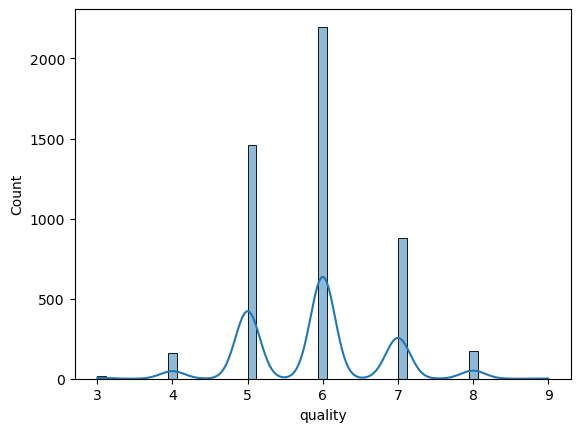

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data = df, x ='quality', kde= True)

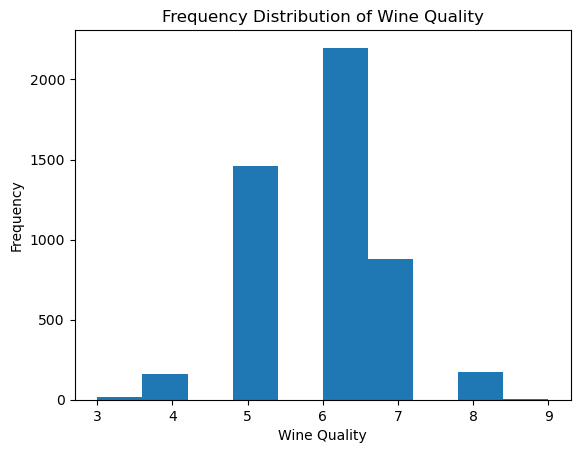

In [7]:
plt.hist(df["quality"], bins=10)  
plt.xlabel("Wine Quality")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Wine Quality")
plt.show()

## Answer 4

In [8]:
def quality_grade(x):
    if x < 5:
        return 1
    elif x<7:
        return 2
    else:
        return 3
df['Quality_grade'] = df['quality'].apply(quality_grade)
df['Quality_grade'].value_counts()

Quality_grade
2    3655
3    1060
1     183
Name: count, dtype: int64

## Answer 5

In [9]:
X = df.drop(['quality','Quality_grade'], axis = 1)
Y = df['Quality_grade']
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [10]:
Y

0       2
1       2
2       2
3       2
4       2
       ..
4893    2
4894    2
4895    2
4896    3
4897    2
Name: Quality_grade, Length: 4898, dtype: int64

## Answer 6

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
norm_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
...,...,...,...,...,...,...,...,...,...,...,...
4893,0.230769,0.127451,0.174699,0.015337,0.089021,0.076655,0.192575,0.077694,0.500000,0.325581,0.516129
4894,0.269231,0.235294,0.216867,0.113497,0.112760,0.191638,0.368910,0.150183,0.390909,0.279070,0.258065
4895,0.259615,0.156863,0.114458,0.009202,0.094955,0.097561,0.236659,0.104685,0.245455,0.279070,0.225806
4896,0.163462,0.205882,0.180723,0.007669,0.038576,0.062718,0.234339,0.030461,0.563636,0.186047,0.774194


## Answer 7

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=25)

In [13]:
y_train

684     2
2003    2
4586    2
3237    3
2528    2
       ..
1175    2
255     3
2934    2
2191    2
318     3
Name: Quality_grade, Length: 3918, dtype: int64

In [14]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
684,8.1,0.46,0.31,1.70,0.052,50.0,183.0,0.99230,3.03,0.42,11.2
2003,7.4,0.30,0.22,5.25,0.053,33.0,180.0,0.99260,3.13,0.45,11.6
4586,5.4,0.29,0.38,1.20,0.029,31.0,132.0,0.98895,3.28,0.36,12.4
3237,6.4,0.23,0.35,4.60,0.039,43.0,147.0,0.99216,3.18,0.40,11.0
2528,6.4,0.16,0.37,1.50,0.037,27.0,109.0,0.99345,3.38,0.50,9.8
...,...,...,...,...,...,...,...,...,...,...,...
1175,6.4,0.25,0.41,8.60,0.042,57.0,173.0,0.99650,3.00,0.44,9.1
255,6.7,0.26,0.39,1.10,0.040,45.0,147.0,0.99350,3.32,0.58,9.6
2934,5.3,0.21,0.29,0.70,0.028,11.0,66.0,0.99215,3.30,0.40,9.8
2191,9.2,0.23,0.35,10.70,0.037,34.0,145.0,0.99810,3.09,0.32,9.7


## Answer 8

In [15]:
Y.value_counts()

Quality_grade
2    3655
3    1060
1     183
Name: count, dtype: int64

In [16]:
from imblearn.under_sampling import RandomUnderSampler

In [19]:
undersampler = RandomUnderSampler( sampling_strategy = "majority",random_state = 2)
input_train_under,output_train_under = undersampler.fit_resample(X_train,y_train)


In [20]:
output_train_under.value_counts()

Quality_grade
3    840
1    152
2    152
Name: count, dtype: int64

## Answer 9 

In [23]:
# Adaboost Model

df['Weights'] = 1/df.shape[0]
df.Weights

0       0.000204
1       0.000204
2       0.000204
3       0.000204
4       0.000204
          ...   
4893    0.000204
4894    0.000204
4895    0.000204
4896    0.000204
4897    0.000204
Name: Weights, Length: 4898, dtype: float64

In [52]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=1)
dt.fit(input_train_under,output_train_under)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[10] <= 10.65\ngini = 0.426\nsamples = 1144\nvalue = [152, 152, 840]'),
 Text(0.25, 0.25, 'gini = 0.635\nsamples = 416\nvalue = [109.0, 108.0, 199.0]'),
 Text(0.75, 0.25, 'gini = 0.218\nsamples = 728\nvalue = [43, 44, 641]')]

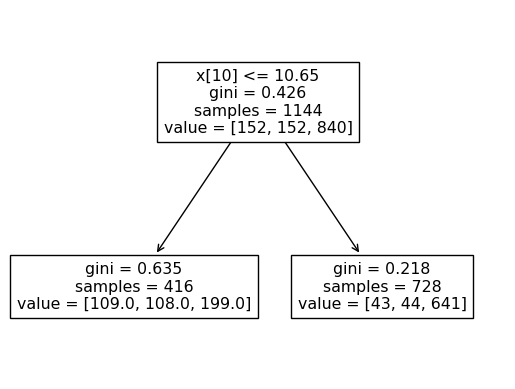

In [53]:
from sklearn.tree import plot_tree
plot_tree(dt)

In [94]:
import numpy as np
pred_y1= dt.predict(X_test)
pred_df = pd.DataFrame(pred_y1, columns = ['Predicted'])
pred_df['y_test'] = y_test
pred_df['weights'] = 0.000204
pred_df

,Predicted,y_test,weights
0,3,NaN,0.000204
1,3,NaN,0.000204
2,3,2.0,0.000204
3,3,NaN,0.000204
4,3,2.0,0.000204
...,...,...,...
975,3,NaN,0.000204
976,3,NaN,0.000204
977,3,NaN,0.000204
978,3,NaN,0.000204


In [68]:
# Step 3 - calculate model weight

sum = 0
for i,j in zip(pred_y1,y_test):
        if i != j:
            sum = sum + 0.000204
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/(error))
alpha1 = calculate_model_weight(sum)
alpha1

0.8478030704080816

In [104]:
# Step 4 - Update weights
for i,j in zip(pred_df['Predicted'],pred_df['y_test']):
  if i == j:
    pred_df['new_weights'] = pred_df['weights'] * np.exp(-alpha1)
  else:
    pred_df['new_weights'] = pred_df['weights'] * np.exp(alpha1)

In [108]:
pred_df.fillna(0, inplace=True)

In [109]:
pred_df

,Predicted,y_test,weights,new_weights
0,3,0.0,0.000204,0.000476
1,3,0.0,0.000204,0.000476
2,3,2.0,0.000204,0.000476
3,3,0.0,0.000204,0.000476
4,3,2.0,0.000204,0.000476
...,...,...,...,...
975,3,0.0,0.000204,0.000476
976,3,0.0,0.000204,0.000476
977,3,0.0,0.000204,0.000476
978,3,0.0,0.000204,0.000476


In [110]:
pred_df[pred_df['Predicted'] == pred_df['y_test']]

,Predicted,y_test,weights,new_weights
21,3,3.0,0.000204,0.000476
22,3,3.0,0.000204,0.000476
45,3,3.0,0.000204,0.000476
51,3,3.0,0.000204,0.000476
66,3,3.0,0.000204,0.000476
68,3,3.0,0.000204,0.000476
128,3,3.0,0.000204,0.000476
159,3,3.0,0.000204,0.000476
188,3,3.0,0.000204,0.000476
281,3,3.0,0.000204,0.000476


In [111]:
pred_df['new_weights'].sum()

0.4667157299120822

In [112]:
pred_df['nomalized_weights'] = pred_df['new_weights']/pred_df['new_weights'].sum()

In [113]:
pred_df['nomalized_weights'].sum()

1.0

In [114]:
pred_df['cumsum_upper'] = np.cumsum(pred_df['nomalized_weights'])
pred_df['cumsum_lower'] = pred_df['cumsum_upper'] - pred_df['nomalized_weights']
pred_df

,Predicted,y_test,weights,new_weights,nomalized_weights,cumsum_upper,cumsum_lower
0,3,0.0,0.000204,0.000476,0.00102,0.001020,0.000000
1,3,0.0,0.000204,0.000476,0.00102,0.002041,0.001020
2,3,2.0,0.000204,0.000476,0.00102,0.003061,0.002041
3,3,0.0,0.000204,0.000476,0.00102,0.004082,0.003061
4,3,2.0,0.000204,0.000476,0.00102,0.005102,0.004082
...,...,...,...,...,...,...,...
975,3,0.0,0.000204,0.000476,0.00102,0.995918,0.994898
976,3,0.0,0.000204,0.000476,0.00102,0.996939,0.995918
977,3,0.0,0.000204,0.000476,0.00102,0.997959,0.996939
978,3,0.0,0.000204,0.000476,0.00102,0.998980,0.997959


In [126]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [127]:
index_values = create_new_dataset(pred_df)
index_values

[753,
 450,
 448,
 174,
 334,
 671,
 344,
 243,
 428,
 600,
 269,
 291,
 976,
 716,
 63,
 880,
 246,
 834,
 350,
 425,
 604,
 429,
 852,
 70,
 383,
 706,
 316,
 157,
 32,
 560,
 786,
 308,
 957,
 620,
 577,
 776,
 373,
 656,
 433,
 17,
 528,
 406,
 33,
 330,
 673,
 840,
 570,
 51,
 913,
 460,
 246,
 330,
 198,
 713,
 376,
 113,
 314,
 94,
 911,
 634,
 72,
 765,
 922,
 930,
 588,
 298,
 499,
 904,
 883,
 918,
 638,
 584,
 26,
 346,
 776,
 360,
 501,
 65,
 498,
 275,
 565,
 779,
 193,
 262,
 880,
 212,
 564,
 606,
 715,
 146,
 819,
 370,
 563,
 926,
 261,
 33,
 584,
 698,
 328,
 830,
 898,
 509,
 767,
 79,
 511,
 192,
 812,
 733,
 469,
 553,
 546,
 600,
 213,
 365,
 322,
 941,
 410,
 709,
 175,
 120,
 848,
 597,
 268,
 793,
 456,
 909,
 886,
 943,
 963,
 327,
 927,
 675,
 846,
 828,
 962,
 332,
 542,
 822,
 454,
 941,
 431,
 544,
 295,
 401,
 293,
 873,
 246,
 118,
 694,
 439,
 784,
 557,
 457,
 56,
 348,
 400,
 661,
 481,
 347,
 778,
 637,
 133,
 178,
 963,
 324,
 601,
 820,
 920,
 909,

In [128]:
second_df = pred_df.iloc[index_values,[0,1,2,3]]
second_df

,Predicted,y_test,weights,new_weights
753,3,0.0,0.000204,0.000476
450,3,0.0,0.000204,0.000476
448,3,0.0,0.000204,0.000476
174,3,0.0,0.000204,0.000476
334,3,0.0,0.000204,0.000476
...,...,...,...,...
494,3,0.0,0.000204,0.000476
622,3,0.0,0.000204,0.000476
668,3,2.0,0.000204,0.000476
371,3,0.0,0.000204,0.000476


In [ ]:
# REPEAT THE PROCESS

In [123]:
# THE SAME PROCEDURE CAN BE CREATED AND RERUN AGAIN TILL THE MAXIMUM ANSWER IS ACHIVED
# ADABOOST WITH LIBRARY

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import KFold, cross_val_score



boosting_classifier = AdaBoostClassifier(estimator=dt, 
                                         learning_rate=1, 
                                         n_estimators=100, 
                                         random_state=1)

In [120]:
kfold = KFold(n_splits=5, random_state=1, shuffle=True)
results = cross_val_score(boosting_classifier, X, Y, cv=kfold, scoring='accuracy')
print(results.mean())

C:\Users\mobin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\mobin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\mobin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\mobin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.7854205665923162


C:\Users\mobin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [124]:
# BAGGING CLASSIFIER

# dt is our first model Decision Tree
dt_bagging_classifier = BaggingClassifier(estimator=dt, 
                                          n_estimators=100, 
                                          random_state=1)
kfold1 = KFold(n_splits=5, random_state=1,shuffle=True )
results2 = cross_val_score(dt_bagging_classifier, X, Y, cv=kfold, scoring='accuracy')
print(results2.mean())

0.8434026807863084
